In [45]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path
import statistics as sts
import lmfit
from lmfit import Model
from scipy.stats import sem
from scipy.integrate import trapz, simps

from matplotlib import markers
import seaborn as sns

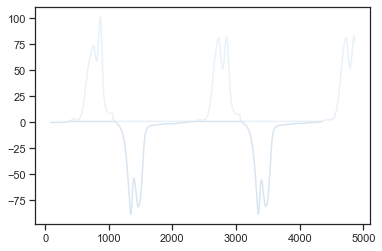

22251.358020158474 21820.176346043067 -20875.191910202826 -21009.857670327274


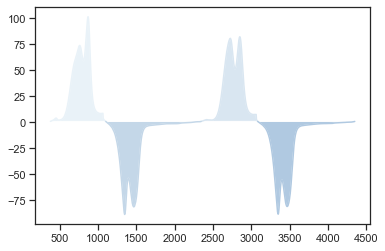

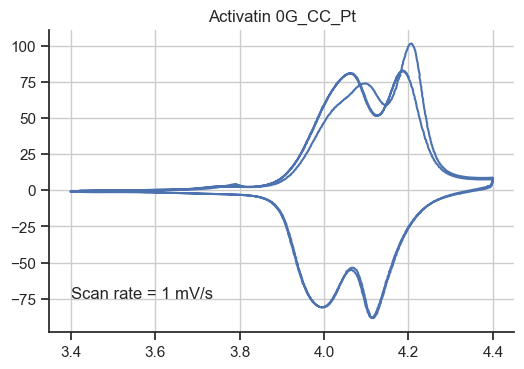

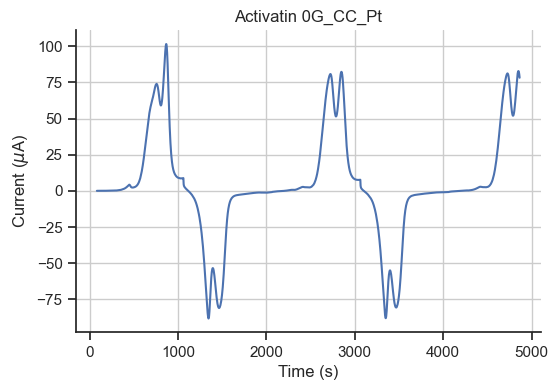

In [46]:
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_07\0G_CC_Pt\CV'
file = os.path.join(path, os.listdir(path)[0])
label = ['Potential vs Li$^+$/Li (V)', 'Current ($\mu$A)', 'Time (s)']# 'Current Density ($\mu$A/cm$^2$)']
data = pd.read_csv(file, sep = '\s+' , usecols=[0, 1, 3], skiprows= 1, names = label)
data.sort_values(by = label[2] ) #To line plot in order of time 
x, y, t = data[label[0]], data[label[1]] * 1e6, data[label[2]]

z = []
w = []
#potential in time
for i in zip(x, y, t):
    if i[1] > 1:
        z.append(i)
    elif i[1] < 1:
        w.append(i)
x_p, y_p, t_p = zip(*z)
x_n, y_n, t_n = zip(*w)
plt.plot(t_p, y_p)
plt.plot(t_n, y_n)
plt.show()
plt.clf()

t1p = []
t2p = []
t1n = []
t2n = []

for i in z:
    if i[2] < 1500:
        t1p.append(i)
    elif 1500 < i[2] < 3500:
        t2p.append(i)

for i in w:
    if 1099 < i[2] < 2800:
        t1n.append(i)
    elif i[2] > 2800:
        t2n.append(i)

x1, y1, t1 = zip(*t1p)
x2, y2, t2 = zip(*t2p)
x3, y3, t3 = zip(*t1n)
x4, y4, t4 = zip(*t2n)

#Area under segment
i1 = trapz(y1, t1)
i2 = trapz(y2, t2)
i3 = trapz(y3, t3)
i4 = trapz(y4, t4)

# Line plot of segments
plt.plot(t1, y1)
plt.plot(t2, y2)
plt.plot(t3, y3)
plt.plot(t4, y4)

#Fill area under curves
plt.fill(t1,y1)
plt.fill(t2, y2)
plt.fill(t3, y3)
plt.fill(t4, y4)

print(i1, i2, i3, i4) # Charge in coulombs

dpi = 100
color = 'tab:purple'
title = 'Activatin 0G_CC_Pt'
sns.set_theme(style= 'ticks')

fig, ax = plt.subplots(facecolor = 'white', dpi = dpi)#
plt.title(title)
plt.plot(x,y)
plt.text(3.4, -75, 'Scan rate = 1 mV/s')
sns.despine()
plt.grid()

fig, ax = plt.subplots(facecolor = 'white', dpi = dpi)
plt.title(title)
sns.lineplot(x = t, y = y)
plt.grid()
sns.despine()



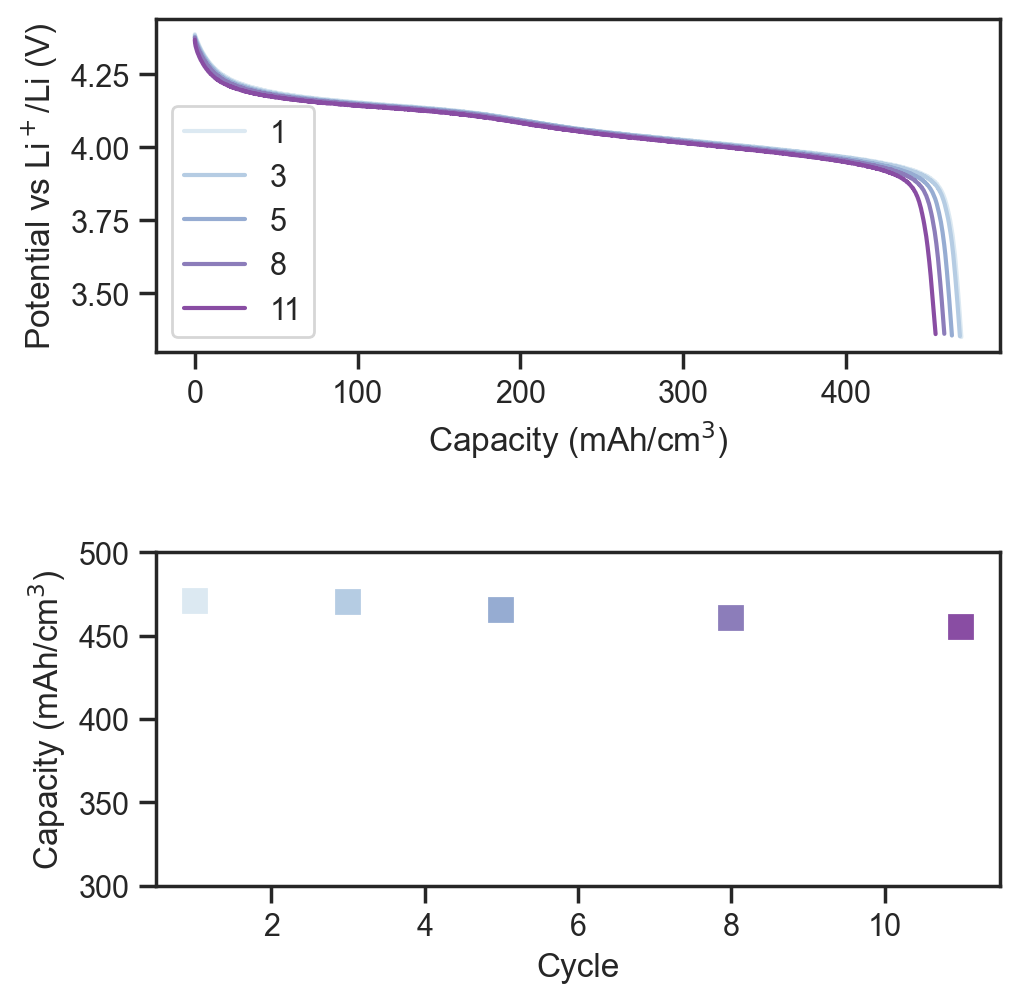

In [47]:
#Charge discharge different C-rate
dpi = 200
sns.set_palette('BuPu')
fig, ax = plt.subplots(facecolor = 'white', dpi = dpi, nrows = 2, figsize = (6, 6) )
fig.tight_layout(pad = 4)
ax[1].set_ylim(300, 500)

col_names = ['Time (s)', 'Potential vs Li$^+$/Li (V)', 'Current (A)', 'Capacity (mAh/cm$^3$)']

path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_07\0G_CC_Pt\Charge Discharge'
# files = os.path.join(path, os.listdir(path))
lith_files = [os.path.join(path, 'lith', i)for i in os.listdir(os.path.join(path, 'lith'))]
lith_files.sort(key=os.path.getctime) #sort files by date
cycles = [1, 3, 5, 8, 11]
capacity = 0
n = 0
for i in lith_files:
    if '1C' in i:
        data = pd.read_csv(i, sep = '\s+' , skiprows= 1, usecols = [1, 2, 3, 5], names = col_names)
        data['C-rate'] = 1
        data['Cycle'] = cycles[n]
        capacity = data[col_names[3]][-1:]
        sns.lineplot(data = data, x = col_names[3], y = col_names[1], label = cycles[n], ax = ax[0])
        sns.scatterplot(data = data, x = 'Cycle', y = capacity, ax = ax[1], marker = 's', s = 100 )
        capacity = pd.concat([ data['Cycle'], data[col_names[3]][-1:]], axis = 1)
        n += 1



<Figure size 432x288 with 0 Axes>

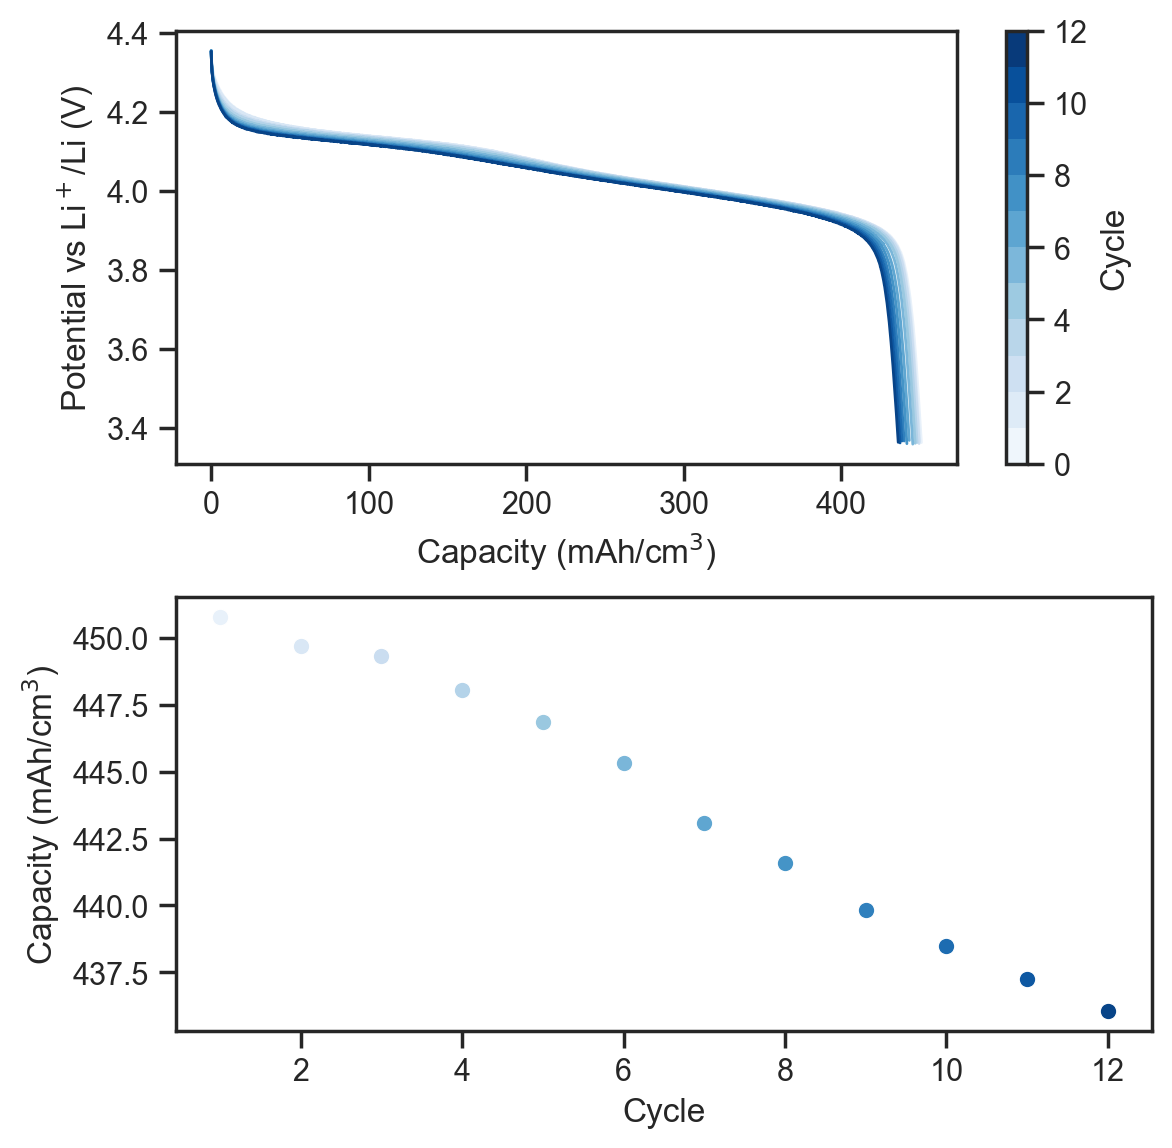

In [122]:

path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_07\0G_CC_Pt_1C\lith'
files = [os.path.join(path, i) for i in os.listdir(path)]
columns = ['t', 'Potential vs Li$^+$/Li (V)', 'Time (s)', 'Current (A)', 'Charge (C)']


palette = 'Blues'
sns.set_palette(palette, n_colors = len(files)) #BuPu_r
data = pd.DataFrame(columns=['Cycle', 'Capacity (mAh/cm$^3$)' ])
thickness = 200 #nm

Z = [[0,0],[0,0]]
cbar = plt.contourf(Z, levels = np.arange(0, len(files) + 1, 1), cmap=palette)
plt.clf()

fig, ax = plt.subplots(facecolor = 'white', dpi = dpi, nrows = 2, figsize = (6, 6) )
fig.tight_layout(pad = 2)
n = 1
for i in files:
    df = pd.read_csv(i, sep = ';', usecols = [0, 1, 2, 4, 5], names = columns, skiprows = 1)
    df['Capacity (mAh/cm$^3$)'] = -1 * df['Charge (C)'] /3.6 / (0.63 * 1e-7 * thickness)    
    df['Cycle'] = n
    capcity = df['Capacity (mAh/cm$^3$)'][-1:]
    sns.lineplot(data = df, x = 'Capacity (mAh/cm$^3$)', y = columns[1], lw =1, ax = ax[0])
    sns.scatterplot(data = df, x = 'Cycle', y = capcity )
    n += 1
plt.colorbar(cbar, ax = ax[0]).set_label('Cycle')



<Figure size 432x288 with 0 Axes>